## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [60]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Загружаем исходные данные

In [61]:
train = pd.read_csv('train-2.csv')
test = pd.read_csv('test.csv')

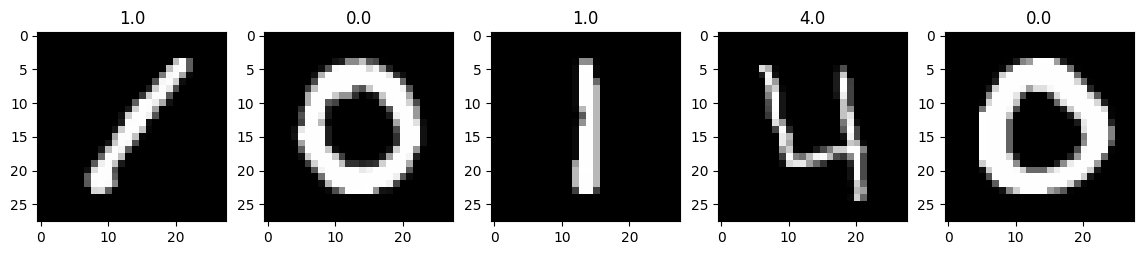

In [62]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [63]:
X = train.drop('label', axis=1)
y = train['label']

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
  X, y, test_size=0.2,
    random_state=42)

#Нормализуем и применяем метод главных компонент для построения признаков

In [68]:
from sklearn.preprocessing import MinMaxScaler
std=MinMaxScaler()
x_train_std=std.fit_transform(x_train)
x_val_std=std.transform(x_val)
x_test_std=std.transform(test)

In [70]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100,svd_solver='randomized',whiten=True)
x_train_pca=pca.fit_transform(x_train_std)
x_val_pca=pca.transform(x_val_std)
x_test_pca=pca.transform(x_test_std)

In [71]:
x_train_pca=pd.DataFrame(x_train_pca)
x_val_pca=pd.DataFrame(x_val_pca)
x_test_pca=pd.DataFrame(x_test_pca)


#Обучаем на предобработанных данных модель логистической регрессии


In [72]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [73]:
model.fit(x_train_pca, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
preds = model.predict(x_val_pca)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, preds)

0.9144047619047619

#Предсказания для тестового файла

In [77]:
preds_test = model.predict(x_test_pca)

## Визуализируем предсказания

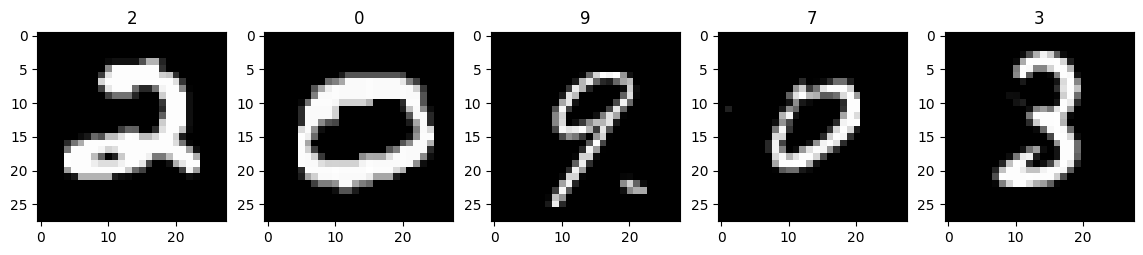

In [78]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % preds_test[i - 1]);

## Готовим файл для отправки

In [85]:
with open('submit.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(preds_test, 1):
        dst.write('%s,%s\n' % (i, p))

In [86]:
!head submit.csv

ImageId,Label
1,2
2,0
3,9
4,7
5,3
6,7
7,0
8,3
9,0
